In [1]:
import numpy as np
import nest
import matplotlib.pyplot as plt

from params import pyr_hcamp_deco2012
from params import int_hcamp_deco2012
from scripts import visualizations
from scripts import initializations
from scripts import optimization


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.6.0
 Built: Sep 28 2023 11:53:34

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
nest.rng_seed = 1
np.random.seed(1)

In [3]:
nest.resolution = 1
runtime = 17988
gamma_rate = 40
theta_rate = 7
G_e = 30
G_i = -5

optimized_weights = np.load('/hpc/mzhu843/modelling/nest/results/optimization/optimised_weights.npy')
print(optimized_weights[0])




Dec 06 21:51:02 correlation_detector [Info]: 
    Default for delta_tau changed from 0.5 to 5 ms

Dec 06 21:51:02 correlomatrix_detector [Info]: 
    Default for delta_tau changed from 0.5 to 5 ms

Dec 06 21:51:02 correlospinmatrix_detector [Info]: 
    Default for delta_tau changed from 0.1 to 1 ms

Dec 06 21:51:02 SimulationManager::set_status [Info]: 
    Temporal resolution changed from 0.1 to 1 ms.
[0.85846714 1.046896   0.44721543 0.88394613 1.03670687 0.74287858
 0.97110339 1.33439129 1.26951511 0.29565697 0.55591763 0.64074857
 1.93452517 1.84579319 1.65521936 1.47973006 0.61221621 0.54513115
 0.01835875 0.35078244 1.06719765 0.92595961 1.57310871 0.86172324
 0.34168275 0.05490518 0.6448553  1.73119267 0.82125143 0.79582462
 1.70904676 1.31486477 1.51087616 1.0107138  1.19774683 0.97086863
 1.65317461 0.56954309 1.54295319 0.95938581 0.73026998 1.41132619
 0.79620225 1.21807448 0.30044648 0.86778627 0.97202488 1.75216807
 1.30997591 0.4900049  0.74987026 1.08372597 0.55073005 

In [4]:
pyr = initializations.initialize_neuron_group('iaf_psc_alpha', 206, pyr_hcamp_deco2012.params)
inter = initializations.initialize_neuron_group('iaf_psc_alpha', 20, int_hcamp_deco2012.params)
ec_input = nest.Create('poisson_generator')
ec_input.set(rate=gamma_rate)
ec_parrot = nest.Create('parrot_neuron', n=20)
nest.Connect(ec_input, ec_parrot)

ca3_input = nest.Create('poisson_generator')
ca3_input.set(rate=gamma_rate)
ca3_parrot = nest.Create('parrot_neuron', n=20)
nest.Connect(ca3_input, ca3_parrot)

ms_input = nest.Create('poisson_generator')
ms_input.set(rate=theta_rate)
ms_parrot = nest.Create('parrot_neuron', n=10)
nest.Connect(ms_input, ms_parrot)




Dec 06 21:51:02 NodeManager::prepare_nodes [Info]: 
    Preparing 281 nodes for simulation.

Dec 06 21:51:02 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 281
    Simulation time (ms): 17988
    Number of OpenMP threads: 1
    Not using MPI

Dec 06 21:51:02 SimulationManager::run [Info]: 
    Simulation finished.


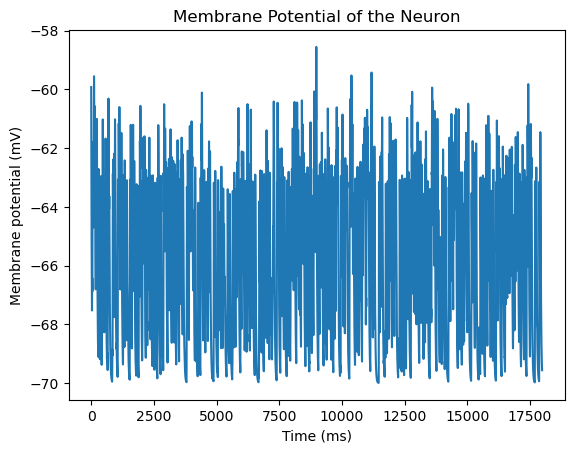

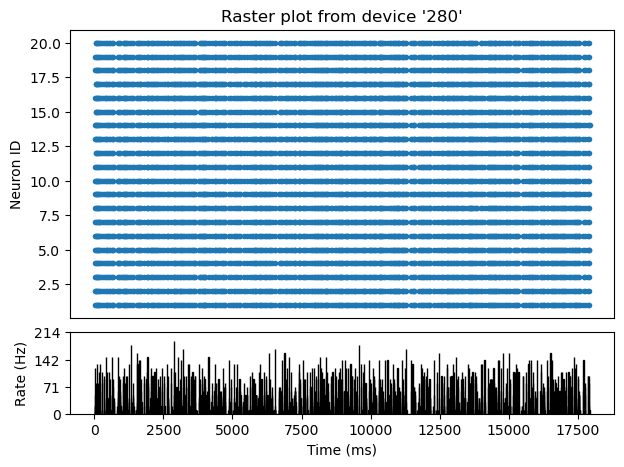

In [5]:
optimization.initialize_connections_hardcoded(pyr, ec_parrot, ca3_parrot, inter, ms_parrot, optimized_weights, G_e, G_i)

spike_recorder = nest.Create('spike_recorder')
nest.Connect(pyr, spike_recorder)

multimeter = nest.Create("multimeter", params={"record_from": ["V_m"]})
nest.Connect(multimeter, pyr[22])

nest.Simulate(runtime)

dmm = nest.GetStatus(multimeter)[0]
Vms = dmm["events"]["V_m"]
ts = dmm["events"]["times"]

plt.plot(ts, Vms)
plt.title("Membrane Potential of the Neuron")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane potential (mV)")
nest.raster_plot.from_device(spike_recorder)
nest.ResetKernel()
